In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd()
LIB_PATH = PROJECT_ROOT / "lib"
LIB_PATH_STR = str(LIB_PATH)

print(f"LIB_PATH: {LIB_PATH_STR}")

if LIB_PATH_STR not in sys.path:
    sys.path.append(LIB_PATH_STR)



# Import your library
from plot.plot_lib import (             # type: ignore
    bluishColorList,
    plot_pivot_bar,
    plot_hist_hue

)
from clean.clean_lib import (           # type: ignore
    null_data, 
    most_frequent_values,number_unique_values ) 

LIB_PATH: /Users/leexin/Documents/_DataScientist/udemy/python_datascience/course_content/_deploy_2_git/lib


In [2]:
import pandas as pd

train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")

In [3]:
display(train_df.head(3))

display(test_df.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## Missing data, Most Frequent Items, Unique Values

In [4]:
null_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Null,0,0,0,0,0,177,0,0,0,0,687,2
Percent Null,0.0,0.0,0.0,0.0,0.0,19.9,0.0,0.0,0.0,0.0,77.1,0.2
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [5]:
most_frequent_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Non-Null,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequency,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total non-null,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [6]:
number_unique_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Non-Null,891,891,891,891,891,714,891,891,891,891,204,889
Number of uniques,891,2,3,891,2,88,7,7,681,248,147,3



<div style="margin-left:7%;width:80%;">

### **Combining Train and Test Sets with a Dataset Identifier**

We merge the original Titanic training and test datasets into a single DataFrame so that we can apply consistent data cleaning, feature engineering, and exploratory analysis across both sets. After concatenation, we create a new column called `"set"` to keep track of each row’s origin:

* All rows are initially labeled `"train"`.
* Rows that belong to the original test dataset are identified because their `Survived` value is missing (`NaN`).
* These rows are relabeled as `"test"`.

This allows us to work with a unified dataset while still being able to distinguish train from test during analysis or modeling.

</div>

In [7]:
all_df = pd.concat([train_df,test_df],axis=0)
all_df["set"] = "train"

all_df.loc[all_df.Survived.isna(),"set"] = "test"

display(all_df.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
297,298,0.0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,train
799,800,0.0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,train
677,678,1.0,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S,train



<div style="margin-left:7%;width:80%;">

## ⭐ **3. General Introduction — Train–Test Distribution Comparison**


</div>


## 3A. Sex

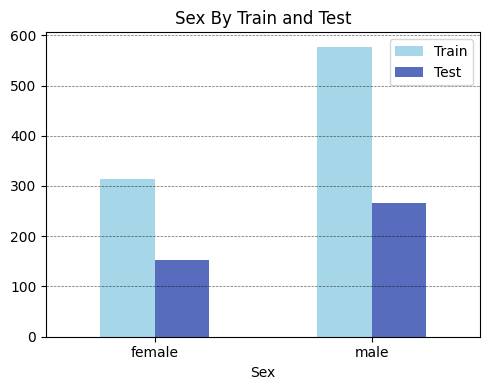

In [8]:
df_crosstab = pd.crosstab(index=all_df["Sex"],columns=all_df['set'])
df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Sex By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.5,
                         title=title,legendLabels=labels)

plt.show()

## 3B. Pclass (Passenger Class)

set,train,test
Pclass,,
1,216,107
2,184,93
3,491,218


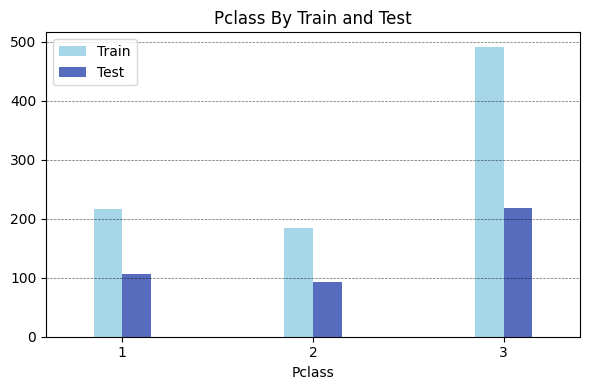

In [9]:
df_crosstab = pd.crosstab(index=all_df["Pclass"],columns=all_df["set"]) 
df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Pclass By Train and Test"
labels = ["Train","Test"]

plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),width=0.3,
                         title=title,legendLabels=labels)
df_crosstab

## 3C. SibSp (Sibling Spouse)

set,train,test
SibSp,,
0,608,283
1,209,110
2,28,14
3,16,4
4,18,4
5,5,1
8,7,2


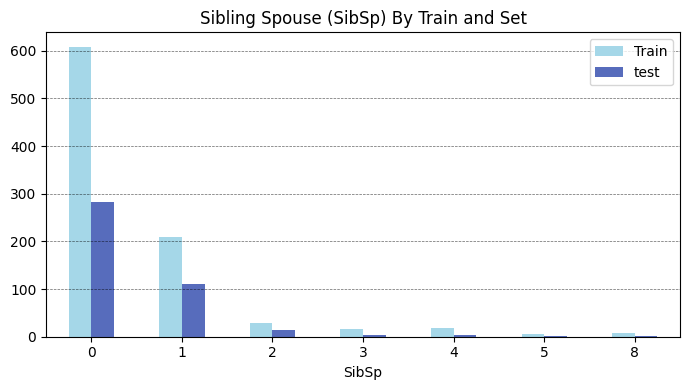

In [10]:
df_crosstab = pd.crosstab(index=all_df["SibSp"],columns=all_df["set"])

df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Sibling Spouse (SibSp) By Train and Set"
labels = ["Train","test"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

df_crosstab

## 3D. Parch (Parent Child)

set,train,test
Parch,,
0,678,324
1,118,52
2,80,33
3,5,3
4,4,2
5,5,1
6,1,1
9,0,2


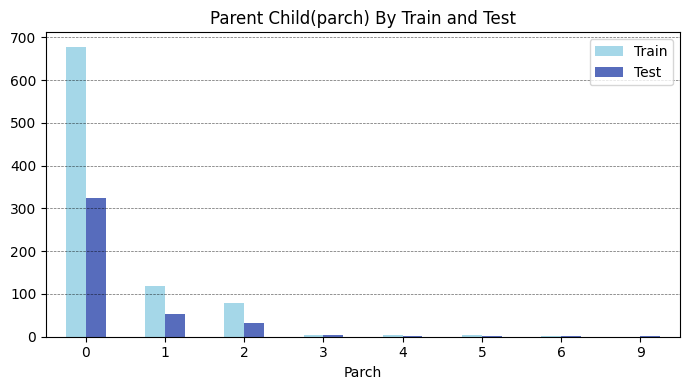

In [11]:
df_crosstab = pd.crosstab(index=all_df["Parch"],columns=all_df["set"])

# reindex or reorder columns
df_crosstab = df_crosstab.reindex(columns=["train","test"])

display(df_crosstab)

title = "Parent Child(parch) By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)
plt.show()

## 3E. Embarked

In [12]:
train_df.loc[train_df.Embarked.isna(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
# Drop rows where Embarked is missing
all_df = all_df.dropna(subset=["Embarked"]).reset_index(drop=True)
train_df = train_df.dropna(subset=["Embarked"]).reset_index(drop=True)


set,train,test
Embarked,,
C,168,102
Q,77,46
S,644,270


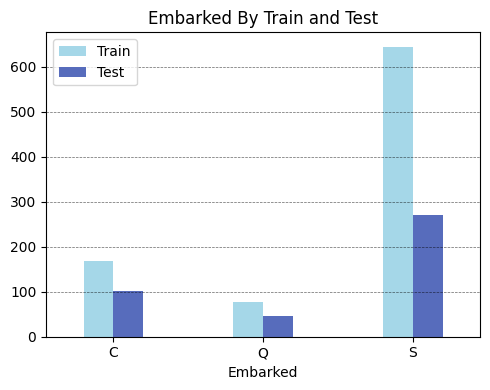

In [14]:
df_crosstab = pd.crosstab(index=all_df["Embarked"],columns=all_df["set"])
df_crosstab = df_crosstab.reindex(columns=["train","test"])
display(df_crosstab)

title = "Embarked By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.4,
                         title=title,legendLabels=labels)

plt.show()

## 3F. Age

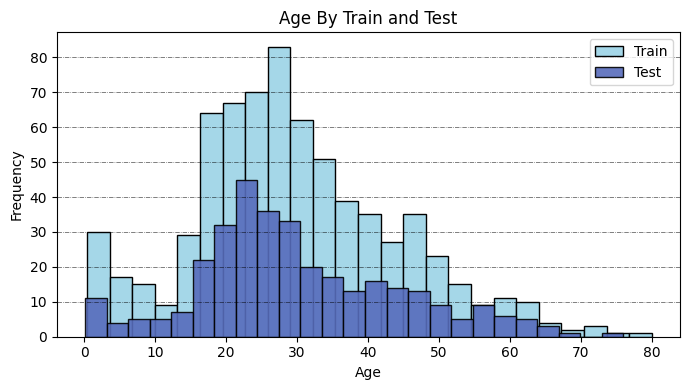

In [15]:
title = "Age By Train and Test"
labels = ["Train","Test"]

plt,_,_ = plot_hist_hue(all_df,feature="Age",hue="set",
                title=title,legendLabels=labels)
plt.show()

## 3G. Fare

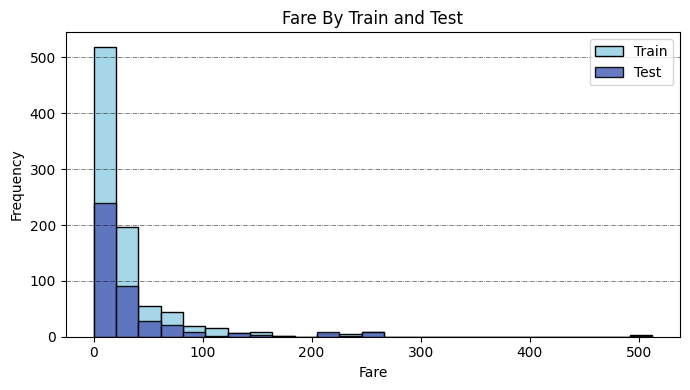

In [16]:
title = "Fare By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_hist_hue(all_df,feature="Fare",hue="set",
              title=title,legendLabels=labels)

## 4. Bivariate Analysis

### 4A. Sex and Survived

Survived,0.0,1.0
Sex,,
female,81,231
male,468,109


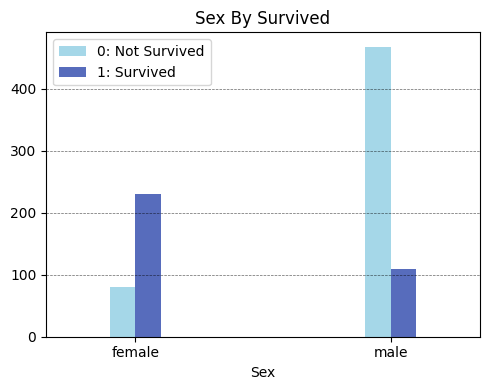

In [17]:
df_crosstab = pd.crosstab(index=all_df["Sex"],columns=all_df["Survived"])

display(df_crosstab)
title="Sex By Survived"
labels=["0: Not Survived","1: Survived"]

plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.2,
                           title=title,legendLabels=labels)

plt.show()

### 4B. Pclass and Survived

Survived,0.0,1.0
Pclass,,
1,80,134
2,97,87
3,372,119


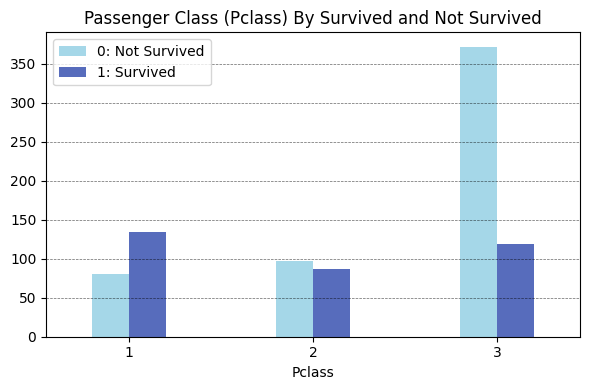

In [18]:
df_crosstab = pd.crosstab(index=all_df["Pclass"],columns=all_df["Survived"])
display(df_crosstab)

title = "Passenger Class (Pclass) By Survived and Not Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),width=0.4,
                         title=title,legendLabels=labels)

### 4C. SibSp (Siblings or Spouse) and Survived

Survived,0.0,1.0
SibSp,,
0,398,208
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


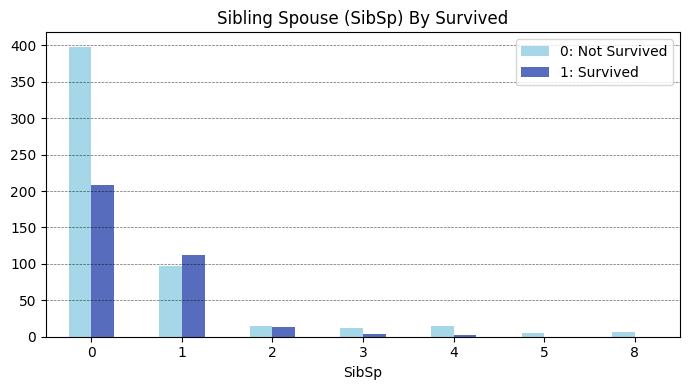

In [19]:
df_crosstab = pd.crosstab(index=all_df["SibSp"],columns=all_df["Survived"])
display(df_crosstab)

title = "Sibling Spouse (SibSp) By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4D. Embarked and Survived

<div style="margin-left:7%;width:75%;">

In the **Titanic dataset**, the `Embarked` column tells you **which port each passenger boarded the ship from**.

There are **three possible values**:

| Code  | Port Name       | Country            | Description                                     |
| ----- | --------------- | ------------------ | ----------------------------------------------- |
| **S** | **Southampton** | England (UK)       | The majority of passengers boarded here.        |
| **C** | **Cherbourg**   | France             | Wealthier passengers often embarked here.       |
| **Q** | **Queenstown**  | Ireland (now Cobh) | Typically emigrants and lower-class passengers. |

---


</div>


Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


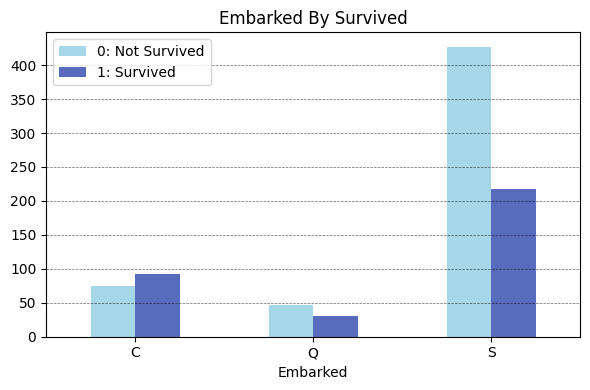

In [20]:
df_crosstab = pd.crosstab(index=train_df["Embarked"],columns=train_df["Survived"])

display(df_crosstab)

title = "Embarked By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),
                         title=title,legendLabels=labels)

### 4E. Age and Survived (Continuous Variable)

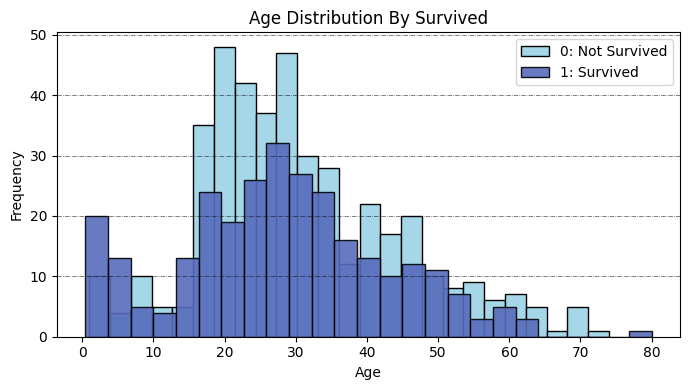

In [21]:
title="Age Distribution By Survived"
labels=["0: Not Survived","1: Survived"]

plt,_,_ = plot_hist_hue(train_df, feature="Age", hue="Survived",
                        title=title,legendLabels=labels)

### 4F. Fare and Survived (Continuous Variable)

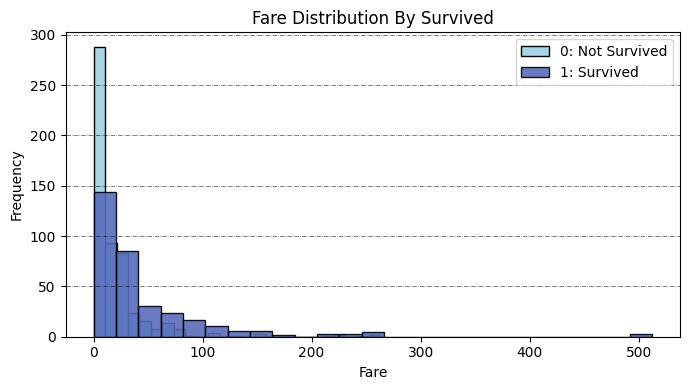

In [22]:
title="Fare Distribution By Survived"
labels=["0: Not Survived","1: Survived"]
plt,_,_ = plot_hist_hue(all_df, "Fare", hue="Survived",
                        title=title,legendLabels=labels)

### 4G. Family Size (Feature Engineering; discrete variable)


<div style="margin-left:6%;width:80%" >


### The columns involved

In the Titanic dataset, you have:

| Column  | Meaning                                       |
| ------- | --------------------------------------------- |
| `SibSp` | Number of **siblings** and **spouses** aboard |
| `Parch` | Number of **parents** and **children** aboard |

So:

* `SibSp = 1` → the passenger had one sibling/spouse on board
* `Parch = 2` → the passenger had two parents/children on board

But both exclude the passenger themself.

---

### Why we add them up (and +1)

```python
all_df["Family Size"] = all_df["SibSp"] + all_df["Parch"] + 1
```



1. `SibSp + Parch` = number of *relatives* aboard
2. `+1` = include the passenger themself

That gives the **total number of family members traveling together**, *including the passenger* — a simple but powerful engineered feature called **Family Size**.



</div>


In [23]:
all_df['Family Size'] = all_df['SibSp'] + all_df['Parch'] + 1
train_df['Family Size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [24]:
all_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set,Family Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,1


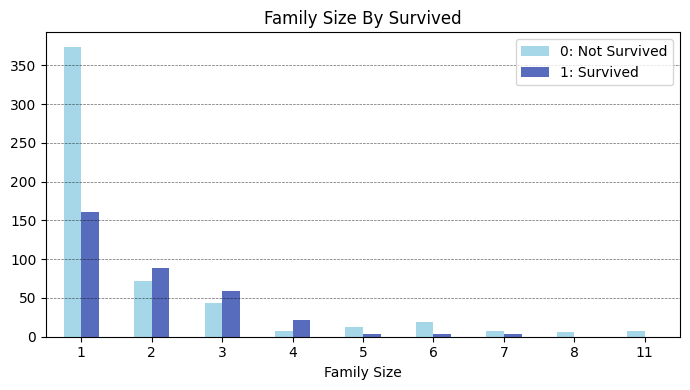

In [25]:
df_crosstab = pd.crosstab(index=train_df["Family Size"],columns=train_df["Survived"])

title = "Family Size By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4H. Age Interval


**Age Interval Encoding**

The *Age Interval* column categorizes individuals into discrete age bands based on predefined thresholds that represent broad life-stage groupings.

**Interval definitions**

| Interval | Age Range        | Description               |
|----------|------------------|---------------------------|
| 0        | Age ≤ 16         | children                  |
| 1        | 16 < Age ≤ 32    | young adults              |
| 2        | 32 < Age ≤ 48    | early middle-aged adults  |
| 3        | 48 < Age ≤ 64    | late middle-aged adults   |
| 4        | Age > 64         | seniors                   |


Missing age values (NaN) are explicitly preserved as **NA** to avoid misclassification and to maintain data integrity.






In [26]:
null_data(all_df[["Age"]])

,Age
Total Null,263
Percent Null,20.1
Types,float64


In [27]:
all_df["Age Interval"] = 0
all_df.loc[all_df["Age"]<=16,"Age Interval"] = 0
all_df.loc[(all_df["Age"]>16) & (all_df["Age"]<=32), "Age Interval"] = 1
all_df.loc[(all_df["Age"]>32) & (all_df["Age"]<=48), "Age Interval"] = 2
all_df.loc[(all_df["Age"]>48) & (all_df["Age"]<=64), "Age Interval"] = 3
all_df.loc[all_df["Age"]>64, "Age Interval"] = 4
all_df.loc[all_df["Age"].isna(),"Age Interval"] = pd.NA

train_df["Age Interval"] = 0
train_df.loc[train_df["Age"] <= 16, "Age Interval"] = 0
train_df.loc[(train_df["Age"] > 16) & (train_df["Age"] <= 32), "Age Interval"] = 1
train_df.loc[(train_df["Age"] > 32) & (train_df["Age"] <= 48), "Age Interval"] = 2
train_df.loc[(train_df["Age"] > 48) & (train_df["Age"] <= 64), "Age Interval"] = 3
train_df.loc[train_df["Age"] > 64, "Age Interval"] = 4

train_df.loc[train_df["Age"].isna(), "Age Interval"] = pd.NA

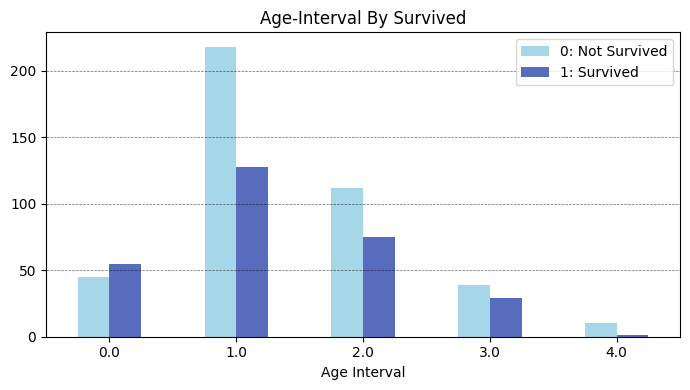

In [30]:
df_crosstab = pd.crosstab(index=train_df["Age Interval"],columns=train_df["Survived"])

title = "Age-Interval By Survived"
labels = ["0: Not Survived","1: Survived"]

plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4I. Fare 

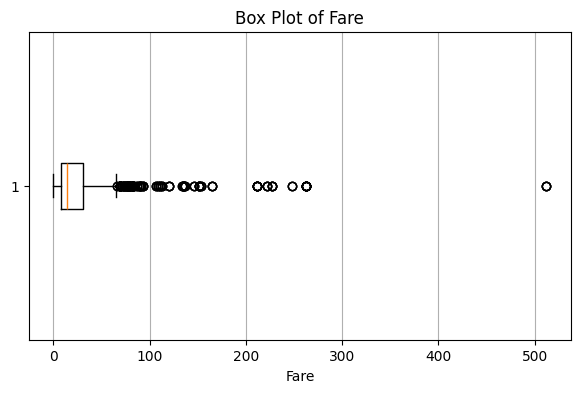

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.boxplot(all_df["Fare"].dropna(), vert=False)


plt.grid(axis="x")
plt.title("Box Plot of Fare")
plt.xlabel("Fare")
plt.show()


> The Fare distribution is strongly right-skewed with a long right tail. Most observations cluster >at lower values, while a small number of high fares extend far beyond the upper quartile, >producing many high-end outliers under the IQR rule.

In [33]:
all_df['Fare'].quantile([0.25, 0.5, 0.75])

0.25     7.8958
0.50    14.4542
0.75    31.2750
Name: Fare, dtype: float64

| Fare Interval      | Socioeconomic Meaning                         |
| ------------------ | --------------------------------------------- |
| **0 (≤ 7.91)**     | Very poor, 3rd class, mostly men, lower decks |
| **1 (7.91–14.45)** | Lower middle, still mostly 3rd class          |
| **2 (14.45–31)**   | Middle class travelers                        |
| **3 (> 31)**       | Wealthiest passengers, mainly 1st class       |
